Import necessary libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read data

In [72]:
df = pd.read_csv("./Data/2008.csv", encoding='ISO-8859-1', low_memory=False)
df.index.name="Id"
df

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Id,,,,,,,,,,,,,,,,,,,,,
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7009723,2008,12,13,6,1002.0,959,1204.0,1150,DL,1636,...,6.0,45.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009724,2008,12,13,6,834.0,835,1021.0,1023,DL,1637,...,5.0,23.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
7009725,2008,12,13,6,655.0,700,856.0,856,DL,1638,...,24.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Group by Hour and DayOfWeek and get mean for each

In [73]:
df['Hour'] = np.floor(df.CRSDepTime/100)
df = df.groupby(['Hour', 'DayOfWeek'])['DepDelay'].mean().reset_index()
df

,Hour,DayOfWeek,DepDelay
0,0.0,1,7.642580
1,0.0,2,4.355609
2,0.0,3,3.447168
3,0.0,4,5.656911
4,0.0,5,7.631415
...,...,...,...
163,23.0,3,9.597662
164,23.0,4,13.396933
165,23.0,5,12.775180
166,23.0,6,9.149951


Map days

In [74]:
days = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
df['DayOfWeek'] = df['DayOfWeek'].map(days)
df

,Hour,DayOfWeek,DepDelay
0,0.0,Monday,7.642580
1,0.0,Tuesday,4.355609
2,0.0,Wednesday,3.447168
3,0.0,Thursday,5.656911
4,0.0,Friday,7.631415
...,...,...,...
163,23.0,Wednesday,9.597662
164,23.0,Thursday,13.396933
165,23.0,Friday,12.775180
166,23.0,Saturday,9.149951


Find 10 records with lowest delays

In [75]:
df = df.sort_values('DepDelay').reset_index(drop=True)
df = df.head(10)
df

,Hour,DayOfWeek,DepDelay
0,4.0,Tuesday,-0.712230
1,5.0,Wednesday,0.449148
2,6.0,Wednesday,0.720269
3,6.0,Thursday,0.864939
4,2.0,Sunday,0.982301
5,6.0,Tuesday,0.985010
6,5.0,Tuesday,0.998486
7,5.0,Thursday,1.089058
8,2.0,Saturday,1.425000
9,6.0,Friday,1.605312


Concat columns

In [76]:
df['ExactDate'] =  df["DayOfWeek"] + " " + df["Hour"].astype(str)
df

,Hour,DayOfWeek,DepDelay,ExactDate
0,4.0,Tuesday,-0.712230,Tuesday 4.0
1,5.0,Wednesday,0.449148,Wednesday 5.0
2,6.0,Wednesday,0.720269,Wednesday 6.0
3,6.0,Thursday,0.864939,Thursday 6.0
4,2.0,Sunday,0.982301,Sunday 2.0
5,6.0,Tuesday,0.985010,Tuesday 6.0
6,5.0,Tuesday,0.998486,Tuesday 5.0
7,5.0,Thursday,1.089058,Thursday 5.0
8,2.0,Saturday,1.425000,Saturday 2.0
9,6.0,Friday,1.605312,Friday 6.0


Display graph

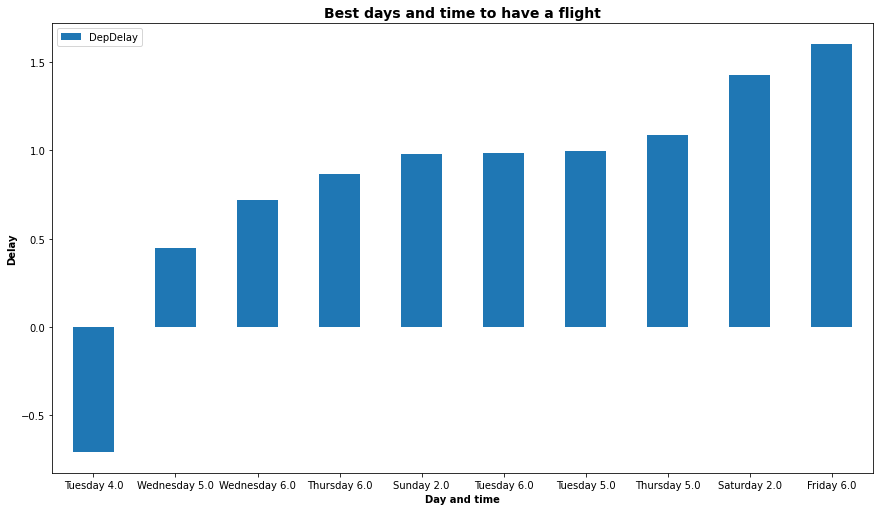

In [77]:
ax = df.plot.bar(x='ExactDate', y='DepDelay', rot=0, figsize=[14.70, 8.27])
plt.title("Best days and time to have a flight", fontsize = 14, weight = "bold")
plt.ylabel('Departure delay', fontsize = 10, weight = "bold")
plt.xlabel('Day and time', fontsize = 10, weight = "bold")
plt.show()